In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Extracción de precios historicos en un rango determinado
disney = yf.download(tickers = 'DIS', start = '2023-01-01', end = '2023-03-31', rounding = True)
disney = disney['Close']
disney.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,DIS
Date,
2023-01-03,87.88
2023-01-04,90.86
2023-01-05,90.80
2023-01-06,92.77
2023-01-09,93.61


In [3]:
disney.index = pd.to_datetime(disney.index)
len_train = int(len(disney)* 0.7) #+ 1
len_train

42

In [4]:
len_test = int(len(disney)*0.3) #- 1
len_test

18

In [5]:
# Definicion de grupos de prueba y entrenamiento
train = disney[0:len_train]
test = disney[len_train:]

[ 1.00000000e+00  8.93388411e-01  8.00584217e-01  7.00702207e-01
  6.16677232e-01  5.20399468e-01  4.09548147e-01  2.95682753e-01
  2.14306470e-01  1.15806493e-01 -2.15164454e-04 -1.11426521e-01
 -2.24162453e-01 -3.01178435e-01 -3.59935298e-01 -4.17865076e-01
 -4.41404738e-01]


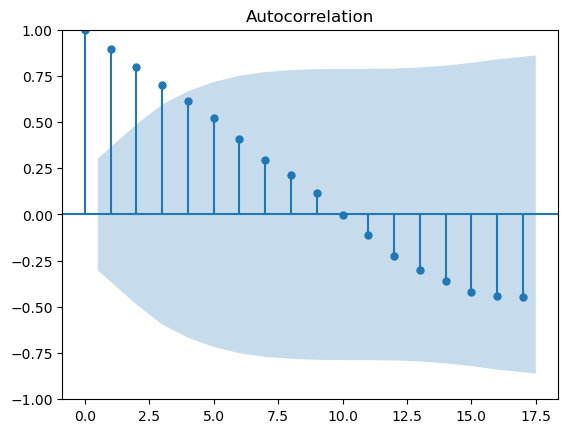

In [6]:
# Generaicon de la funcion de autocorrelacion
from statsmodels.tsa.stattools import  acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_array = acf(train)
print(acf_array)
# Grafico con un nivel de confianza del 95%
plot_acf(train, alpha = 0.05)
plt.show()

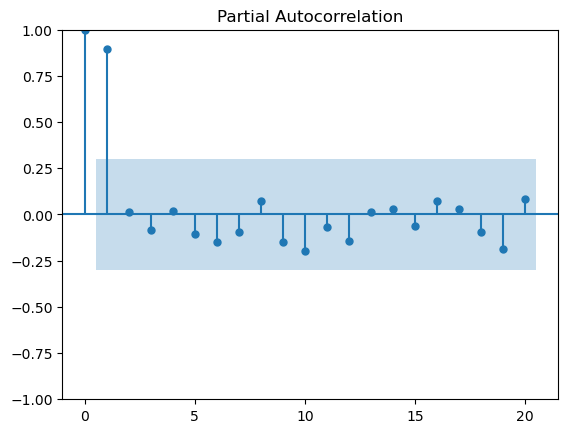

In [7]:
# Determination  del valor adecuado de p para AR(p) a apartir de la funcion de Autocorrelacion parcial
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags = 20)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

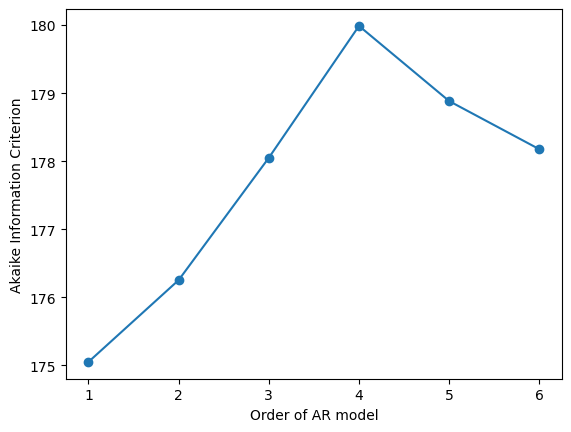

In [8]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de información Akaike
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1, 7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criterion')
plt.show();

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

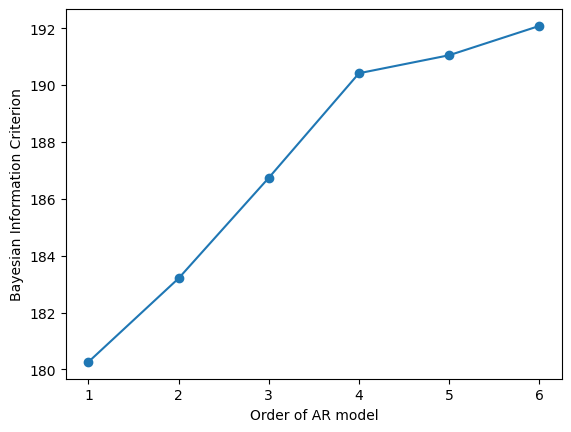

In [9]:
# Ahora el criterio Bayesian
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1, 7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

### Como en ambos casos se tiene el menor valor para p=1 procedemos a utilizar AR(1)

In [11]:
# Modelo AR(1) 
mod = ARIMA(train, order = (1, 0, 0))
res = mod.fit()
predicciones = res.forecast(len(test))
predicciones

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


42    99.825979
43    99.744353
44    99.665054
45    99.588015
46    99.513172
47    99.440462
48    99.369825
49    99.301201
50    99.234533
51    99.169766
52    99.106844
53    99.045716
54    98.986330
55    98.928637
56    98.872589
57    98.818138
58    98.765239
59    98.713848
60    98.663922
Name: predicted_mean, dtype: float64

In [12]:
conf = res.get_forecast(len(test)).conf_int(alpha = 0.05)
conf

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower DIS,upper DIS
42,96.397122,103.254837
43,94.963825,104.524881
44,93.892163,105.437946
45,93.014539,106.161491
46,92.264761,106.761583
47,91.608215,107.272710
48,91.023930,107.715720
49,90.497971,108.104431
50,90.020466,108.448601
51,89.584086,108.755445


In [13]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [14]:
predicciones

,index,predicted_mean
0,42,99.825979
1,43,99.744353
2,44,99.665054
3,45,99.588015
4,46,99.513172
5,47,99.440462
6,48,99.369825
7,49,99.301201
8,50,99.234533
9,51,99.169766


In [15]:
acumulador1 = 0
acumulador2 = 0

for contador in range(0, 18):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1])**2
    acumulador2 = acumulador2 + np.abs((test.iloc[contador][1] - predicciones.iloc[contador][1]) /
                                        test.iloc[contador][1])
mse = acumulador1 / 18
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 18) * 100, 2)
print("RMSE =", rmse, "MAPE =", mape, "%")

RMSE = 5.37 MAPE = 5.29 %


In [16]:
# Pronostico de los siguientes 22 periodos(dias) posteriores al ultimo dato  historico
predicciones = res.forecast(len(test) + 22)
predicciones.tail(5)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


78    97.973411
79    97.944590
80    97.916590
81    97.889388
82    97.862962
Name: predicted_mean, dtype: float64

In [17]:
conf = res.get_forecast(len(test) + 22).conf_int(alpha = 0.1)
conf.tail(5)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower DIS,upper DIS
78,86.570959,109.375863
79,86.499492,109.389687
80,86.431389,109.401791
81,86.366465,109.412311
82,86.304549,109.421374


In [23]:
triain = pd.DataFrame(train)
lista = test['Date']
lista = pd.DataFrame(lista)
test.index = test['Date']
test.drop(columns = ['Date'], inplace = True)

In [27]:
lista2 = []
for day in range(1, 22):
    fecha = ((pd.to_datetime("2023-03-30") + pd.offsets.BDay(day)).date())
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ['Date'])
lista2['Date'] = pd.to_datetime(lista2['Date'])

In [ ]:
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas = fechas.reset_index()
fechas.drop(columns = ['index'], inplace = True)
fechas

In [ ]:
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()
predicciones.drop(columns = ['index'], inplace = True)
predicciones

In [ ]:
frames = [fechas, predicciones]
result = pd.concat(frames, axis = 1, join = 'inner')
result.columns = ['Date', 'Predicciones']
result.index = result['Date']
result.drop(columns = ["Date"], inplace = True)
result

In [ ]:
conf = conf.reset_index()
conf.drop(columns = ["index"], inplace = True)
frames = [fechas, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')
intervalos.index = intervalos['Date']
intervalos.drop(columns = ['Date'], inplace = True)
intervalos

In [ ]:
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = "Predicciones", color = 'red')
plt.plot(intervalos["lower DIS"], label = "Lim. Inf. 90%", color = 'blue')
plt.plot(intervalos["upper DIS"], label = "Lim. sup. 90%", color = 'blue')
plt.legend(loc = 'best')
plt.title("Pronosticos mediante AR(1)")
plt.show()